# Model selection in R 


In this lesson, we will implement various model selection methods on real data in R.

Let's use the `fabric` data to illustrate the implementation of model selection techniques. This dataset contains the acoustic absorption coefficients of 24 woven fabrics with different air gap distances ($d=0,1,2,3cm$). There are four different possible response variables based on these air gap distances:

1. `acoustic0`: air gap distance $d=0 cm$

2. **`acoustic1`:air gap distance $d=1 cm$**

3. `acoustic2`: air gap distance $d=2 cm$

4. `acoustic3`: air gap distance $d=3 cm$

For simplicity, we'll focus on `acoustic1`. The following predictors are given:

5. `thickness`: the thickness of the woven fabric, in mm

6. `diameter`: the diameter of the woven fabric, in mm

7. `perforation`: perforation was measured as a percentage, and is relate to the pore width and yarn width of the woven fabric

8. `weight`: the weight of the woven fabric, measured in g/m^2

9. `stiffness`: the weight of the woven fabric, measured in mN x cm

10. `airPerm`: the air permeability of the woven fabric, measured in mm/s

According to Tang, Kong, and Yan, "It has been found that the acoustic absorption properties" of a woven fabric are "mainly determined by the perforation ratio and air permeability." The goal of this analysis is to see if other fabric properties can useful in predicting the absorption coefficient with $d = 1$, i.e., `acoustic1`. We'll use several different model selection techniques to show how they are implemented and how they might differ from one another.

Source: X. Tang, D. Kong, X. Yan (2018). "Multiple Regression Analysis
of a Woven Fabric Sound Absorber," Textile Research Journal, 
https://doi.org/10.1177/0040517518758001.

In [3]:
#Another way to read the data:
#fabric = read.table("http://users.stat.ufl.edu/~winner/data/fabricsoundabsorb.csv", header = TRUE, sep = ",")

library(RCurl) #a package that includes the function getURL(), which allows for reading data from github.
library(ggplot2)
url = getURL(paste0("https://raw.githubusercontent.com/bzaharatos/",
                    "-Statistical-Modeling-for-Data-Science-Applications/",
                    "master/Modern%20Regression%20Analysis%20/",
                    "Datasets/fabricsoundabsorb.csv"))
fabric = read.csv(text = url, sep = ",")
#names(hprice) = c("price", "area", "bath", "bed","fireplace","lot", "age","fireplace_yn")

head(fabric)
summary(fabric)

sampleID,thickness,diameter,perforation,weight,stiffness,airPerm,acoustic0,acoustic1,acoustic2,acoustic3
1,0.547,0.269,6.14,247,181.90,805.4,0.076,0.330,0.413,0.313
2,0.541,0.378,6.08,253,74.40,887.8,0.092,0.339,0.347,0.261
3,0.875,0.584,4.97,366,71.41,598.4,0.129,0.455,0.411,0.316
4,0.640,0.527,4.87,319,161.50,799.2,0.115,0.433,0.427,0.321
5,0.750,0.534,4.51,292,156.20,753.2,0.095,0.362,0.382,0.273
6,0.539,0.368,4.39,232,171.50,704.0,0.073,0.371,0.422,0.312


    sampleID       thickness         diameter       perforation   
 Min.   : 1.00   Min.   :0.5260   Min.   :0.2200   Min.   :1.210  
 1st Qu.: 6.75   1st Qu.:0.6438   1st Qu.:0.3395   1st Qu.:2.460  
 Median :12.50   Median :0.7685   Median :0.4705   Median :3.110  
 Mean   :12.50   Mean   :0.7302   Mean   :0.4320   Mean   :3.378  
 3rd Qu.:18.25   3rd Qu.:0.8097   3rd Qu.:0.5340   3rd Qu.:4.195  
 Max.   :24.00   Max.   :0.9310   Max.   :0.5840   Max.   :6.140  
     weight        stiffness         airPerm        acoustic0     
 Min.   :228.0   Min.   : 49.60   Min.   :401.5   Min.   :0.0730  
 1st Qu.:251.8   1st Qu.: 81.91   1st Qu.:510.4   1st Qu.:0.0905  
 Median :303.5   Median :139.41   Median :600.6   Median :0.1120  
 Mean   :302.0   Mean   :134.81   Mean   :601.4   Mean   :0.1163  
 3rd Qu.:347.8   3rd Qu.:171.40   3rd Qu.:685.7   3rd Qu.:0.1355  
 Max.   :373.0   Max.   :275.56   Max.   :887.8   Max.   :0.1890  
   acoustic1        acoustic2        acoustic3     
 Min.   :0

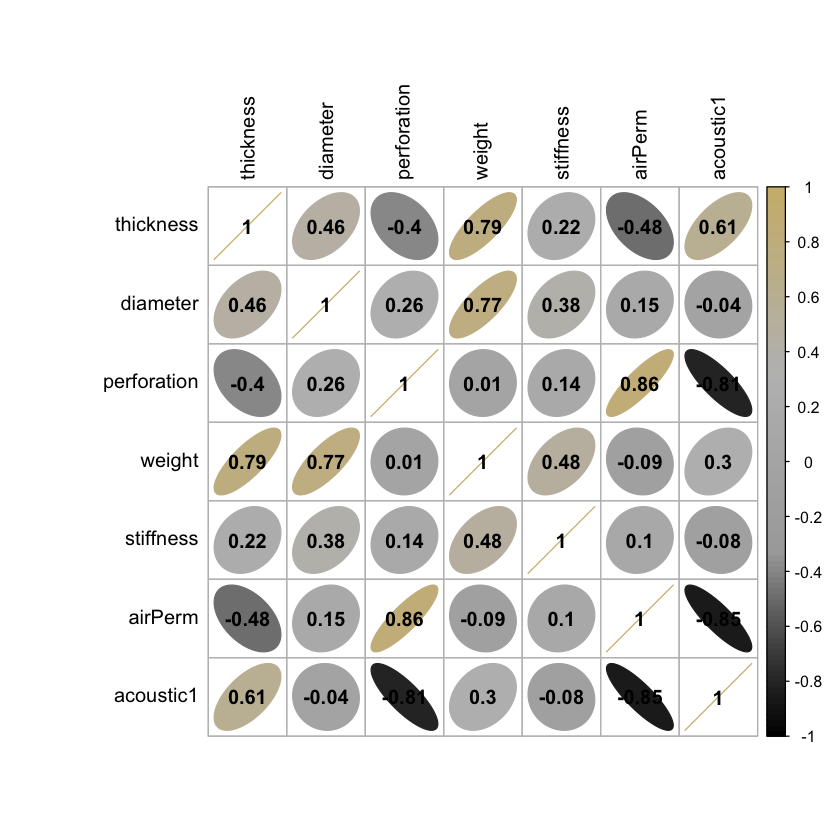

In [4]:
library(corrplot)
col4 = colorRampPalette(c("black", "darkgrey", "grey","#CFB87C"))
corrplot(cor(fabric[c(2:7,9)]), method = "ellipse", col = col4(100),  addCoef.col = "black", tl.col = "black")

Let's start with the full model, which uses `acoustic1` as the response and `thickness`, `diameter`, `perforation`, `weight`, `stiffness`, and `airPerm` as predictors.

In [5]:
lm_fabric = lm(acoustic1 ~ thickness + diameter + perforation + weight + stiffness + airPerm, fabric) 
summary(lm_fabric)


Call:
lm(formula = acoustic1 ~ thickness + diameter + perforation + 
    weight + stiffness + airPerm, data = fabric)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.062713 -0.021894 -0.002938  0.020573  0.065304 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.5858162  0.0896400   6.535 5.09e-06 ***
thickness   -0.0288504  0.1606300  -0.180   0.8596    
diameter    -0.1340331  0.1192525  -1.124   0.2767    
perforation -0.0215229  0.0128301  -1.678   0.1117    
weight       0.0008418  0.0004612   1.825   0.0856 .  
stiffness   -0.0002042  0.0001622  -1.258   0.2253    
airPerm     -0.0003019  0.0001228  -2.458   0.0250 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.03871 on 17 degrees of freedom
Multiple R-squared:  0.8393,	Adjusted R-squared:  0.7826 
F-statistic:  14.8 on 6 and 17 DF,  p-value: 6.511e-06


Here, we see that several of the predictors have t-tests with high p-values (higher than the standard $\alpha = 0.05$). Instead of just removing all of those, let's perform backward selection, removing the predictor with the largest p-value greater than $\alpha_0 = 0.15$, `thickness` in this case, and then refit the model. We can do this with the `update()` function. Remember that $\alpha_0$, sometimes called the "p-to-remove", is used as a cuttoff in backward selection, and if the goal is prediction, then $0.15$ or $0.2$ is thought to work well.

In [6]:
lm_fabric = update(lm_fabric, .~.-thickness)
summary(lm_fabric)


Call:
lm(formula = acoustic1 ~ diameter + perforation + weight + stiffness + 
    airPerm, data = fabric)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.061055 -0.024693 -0.003761  0.020839  0.064457 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.5766761  0.0717833   8.034 2.31e-07 ***
diameter    -0.1299283  0.1138523  -1.141   0.2687    
perforation -0.0211186  0.0122868  -1.719   0.1028    
weight       0.0007765  0.0002758   2.815   0.0115 *  
stiffness   -0.0001961  0.0001516  -1.293   0.2122    
airPerm     -0.0002959  0.0001150  -2.573   0.0192 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.03765 on 18 degrees of freedom
Multiple R-squared:  0.839,	Adjusted R-squared:  0.7943 
F-statistic: 18.76 on 5 and 18 DF,  p-value: 1.416e-06


Notice that our p-values have changed! For example, before, `weight` as not sigificant at the $\alpha = 0.05$ level and now it is. And, importantly, we still have p-values above $\alpha_0 = 0.15$. So, let's remove the predictor with the largest p-value, namely, `diameter`.

In [7]:
lm_fabric = update(lm_fabric, .~.-diameter)
summary(lm_fabric)


Call:
lm(formula = acoustic1 ~ perforation + weight + stiffness + airPerm, 
    data = fabric)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.056134 -0.032975 -0.000806  0.025339  0.071500 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.6009065  0.0691148   8.694 4.76e-08 ***
perforation -0.0241498  0.0120914  -1.997  0.06032 .  
weight       0.0005408  0.0001842   2.935  0.00849 ** 
stiffness   -0.0001887  0.0001526  -1.236  0.23144    
airPerm     -0.0002958  0.0001159  -2.551  0.01950 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.03795 on 19 degrees of freedom
Multiple R-squared:  0.8274,	Adjusted R-squared:  0.791 
F-statistic: 22.77 on 4 and 19 DF,  p-value: 5.01e-07


It looks like we have at least one more iteration, since `stiffness` has a p-value greater than $\alpha_0$.

In [8]:
lm_fabric = update(lm_fabric, .~.-stiffness)
summary(lm_fabric)


Call:
lm(formula = acoustic1 ~ perforation + weight + airPerm, data = fabric)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.074211 -0.025324  0.003821  0.020601  0.076329 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.6159414  0.0689289   8.936 2.03e-08 ***
perforation -0.0244787  0.0122470  -1.999   0.0594 .  
weight       0.0004294  0.0001628   2.638   0.0158 *  
airPerm     -0.0003053  0.0001172  -2.605   0.0169 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.03845 on 20 degrees of freedom
Multiple R-squared:  0.8135,	Adjusted R-squared:  0.7855 
F-statistic: 29.08 on 3 and 20 DF,  p-value: 1.717e-07


Notice that each of our remaining predictors have a p-value less than $\alpha_0 = 0.15$. This is the "best" model, according to backward selection. Of course, there's nothing about backward selection that is consistent with statistical inference, so we should use this procedure with caution! The same is true for forward selection and other stepwise selection methods.

### AIC, BIC, and adjusted $R^2$

Recall that AIC is defined as

$$AIC\left(g\left(\mathbf{x}; \widehat{\boldsymbol\beta}\right) \right) = 2(p+1) + n\log(RSS/n).$$

We can use AIC (or BIC, or adjusted $R^2$) to help us choose a "best" model. One way to do this would be:

1. Fit *all* simple linear regression models, and report the one with the lowest RSS. This is allowed because when the number of predictors is the same, RSS (and equivalently, $R^2$) can be used to compare models.


2. Fit all two-predictor models, and report the one with the lowest RSS.


3. Continue this process: fit all $k$-predictor models, and report the one with the lowest RSS.


4. At this point, we should have the "best" models (in terms of RSS) for all models of size $k$, where $k$ ranges from $1$ to $p$. We can no longer use RSS to compare across *these* models, since each is of a difference size. So, we use a criterion that takes into account the tradeoff between fit (RSS) and model size/complexity ($p$).

The `regsubsets()` function in the `leaps` library can help us streamline this process.

In [9]:
library(leaps)
library(MASS)

n = dim(fabric)[1]; 
reg1 = regsubsets(acoustic1 ~ thickness + diameter + perforation + weight + stiffness + airPerm,
  data = fabric)
rs = summary(reg1)
rs$which


(Intercept),thickness,diameter,perforation,weight,stiffness,airPerm
TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE
TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE
TRUE,FALSE,FALSE,TRUE,TRUE,FALSE,TRUE
TRUE,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE
TRUE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE
TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE


The table above provides the best model (in terms of RSS) of size $k$, for $k = 1,2,...,6$. For example, the best simple linear regression model is the model `acoustic1` = $\widehat\beta_0 + \widehat\beta_1 \times$ `airPerm`. Now, to compare these models with each other, we calculate AIC, and plot the AIC values as a function of model size.

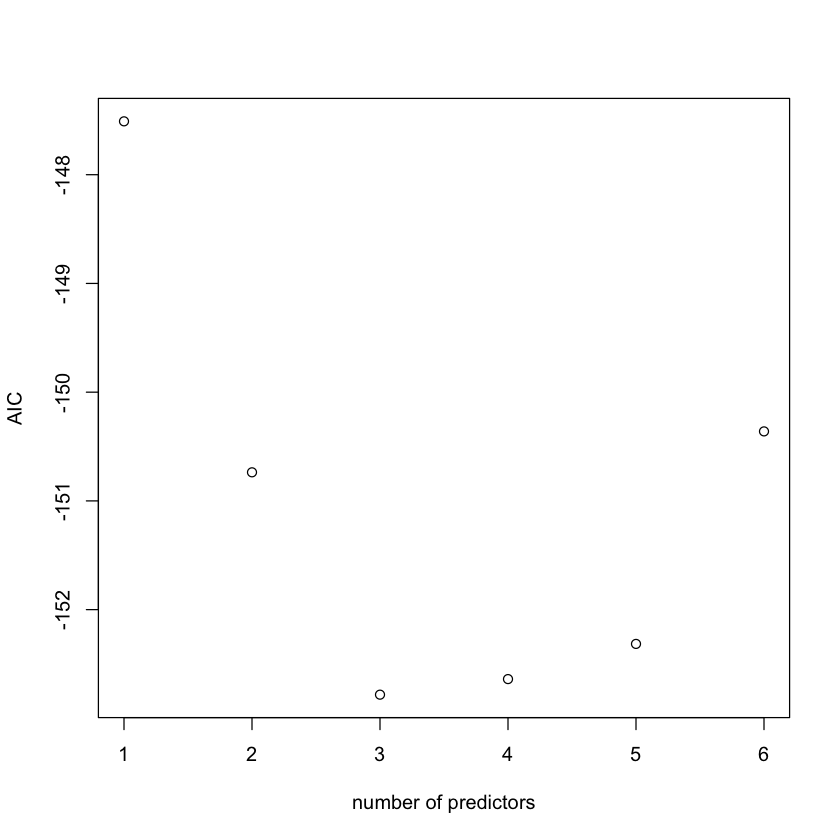

In [21]:
AIC = 2*(2:7) + n*log(rs$rss/n)
plot(AIC ~ I(1:6), xlab = 'number of predictors', ylab = 'AIC')

In this plot, we see that the model of size $k = 3$ has the lowest AIC. That means that our model selection procedure has chose: 

`acoustic1` = $ \hat\beta_0 + \hat\beta_1 \times \hat\beta_2 \times$ `weight` $ + \hat\beta_3 \times$ `airPerm`

Interestingly, using 

$$
R^2_a = 1 - \frac{RSS/(n-(p+1))}{TSS/(n-1)}
$$

we get a different model, namely the model the five predictors (`diameter`, `perforation`, `weight`, `stiffness`, `airPerm`)

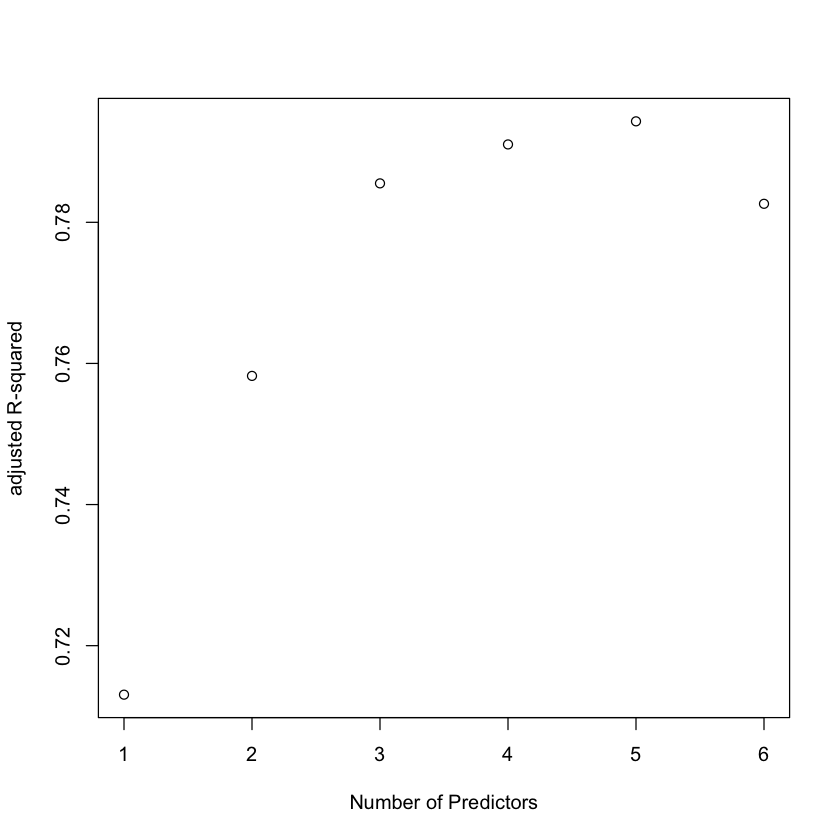

In [15]:
plot(1:6, rs$adjr2, xlab = 'Number of Predictors', ylab = 'adjusted R-squared')

And BIC, which is given as 

$$BIC\left(g\left(\mathbf{x}; \widehat{\boldsymbol\beta}\right) \right) = (p+1)\log(n) -2\log L\left(\widehat{\boldsymbol\beta} \right),$$

chooses the same model as AIC.

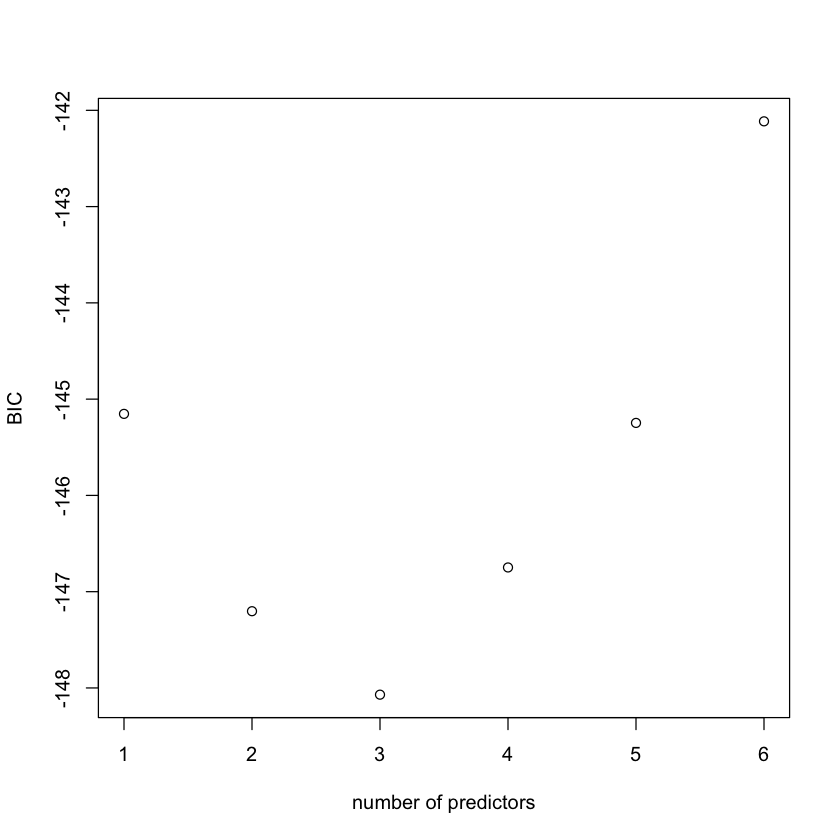

In [16]:
BIC = log(n)*(2:7) + n*log(rs$rss/n) 
plot(BIC ~ I(1:6), xlab = "number of predictors", ylab = "BIC")

Is there evidence of collinearity in the data using the foll model? How about using the model chosen by AIC?

In [18]:
library(car) #for the vif() function

lm_fabric_full = lm(acoustic1 ~ thickness + diameter + perforation + weight + stiffness + airPerm, data = fabric)
vif(lm_fabric_full)
kappa(lm_fabric_full)
cor(model.matrix(lm_fabric_full)[,-1])

Loading required package: carData


thickness    diameter perforation      weight   stiffness     airPerm 
   5.717772    2.990249    4.253145    8.217969    1.458591    4.285540

[1] 12045.9

,thickness,diameter,perforation,weight,stiffness,airPerm
thickness,1.0000000,0.4577137,-0.39698942,0.78997738,0.2176814,-0.48123411
diameter,0.4577137,1.0000000,0.26253154,0.76666870,0.3832821,0.14997886
perforation,-0.3969894,0.2625315,1.00000000,0.01141017,0.1414211,0.85896316
weight,0.7899774,0.7666687,0.01141017,1.00000000,0.4833248,-0.08765898
stiffness,0.2176814,0.3832821,0.14142111,0.48332484,1.0000000,0.10339666
airPerm,-0.4812341,0.1499789,0.85896316,-0.08765898,0.1033967,1.00000000


For the full model, we see:

1. The VIF for the estimators associated with `thickness` and `weight` are in the "some evidence of collinearity" range (i.e., $5 < VIF < 10$).

2. The condition number is very high ($>> 30$), suggesting collinearity is an issue.

3. The correlation matrix for the predictors shows high pairwise correlations.

In [19]:
lm_fabric_aic = lm(acoustic1 ~  perforation + weight + airPerm, data = fabric)
vif(lm_fabric_aic)
kappa(lm_fabric_aic)
cor(model.matrix(lm_fabric_aic)[,-1])

perforation      weight     airPerm 
   3.927635    1.037730    3.957534

[1] 4531.029

,perforation,weight,airPerm
perforation,1.00000000,0.01141017,0.85896316
weight,0.01141017,1.00000000,-0.08765898
airPerm,0.85896316,-0.08765898,1.00000000


For the full model, we see:

1. The VIF for the estimators are now below $5$, which is not evidence of collinearity.

2. The condition number is still very high ($>> 30$), suggesting collinearity is an issue.

3. The correlation matrix for the predictors shows high pairwise correlations. Specifically, `airPerm` and `perforation` are highly correlated. We might remove one and refit the model.